In [253]:
# Date: 2021-08-06 
# Favorite Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
from matplotlib.pyplot import figure
from scipy import stats

In [2]:
spotifydf = pd.read_csv('Spotify Top 200 Global (2017-2021).csv')
spotifydf.head(10)

,Rank,Track,Artist,Streams,Link,Week,Album_Name,Duration_MS,Explicit,Track_Number_on_Album,Artist_Followers,Artist_Genres
0,1,Starboy,The Weeknd,25734078,https://open.spotify.com/track/5aAx2yezTd8zXrk...,2017-01-06,Starboy,230453,True,1,31348348,"['canadian contemporary r&b', 'canadian pop', ..."
1,2,Closer,The Chainsmokers,23519705,https://open.spotify.com/track/7BKLCZ1jbUBVqRi...,2017-01-06,Closer,244960,False,1,17742887,"['dance pop', 'edm', 'electropop', 'pop', 'pop..."
2,3,Rockabye (feat. Sean Paul & Anne-Marie),Clean Bandit,21216399,https://open.spotify.com/track/5knuzwU65gJK7IF...,2017-01-06,Rockabye (feat. Sean Paul & Anne-Marie),251088,False,1,4296325,"['dance pop', 'edm', 'pop', 'pop dance', 'post..."
3,4,Let Me Love You,DJ Snake,19852704,https://open.spotify.com/track/4pdPtRcBmOSQDlJ...,2017-01-06,Encore,205946,False,13,7312319,"['dance pop', 'edm', 'electronic trap', 'pop',..."
4,5,I Don’t Wanna Live Forever (Fifty Shades Darke...,ZAYN,18316326,https://open.spotify.com/track/3NdDpSvN911VPGi...,2017-01-06,I Don’t Wanna Live Forever (Fifty Shades Darker),245200,False,1,15423979,"['dance pop', 'pop', 'post-teen pop', 'uk pop']"
5,6,Don't Wanna Know,Maroon 5,18064374,https://open.spotify.com/track/5MFzQMkrl1FOOng...,2017-01-06,Don't Wanna Know,214480,False,1,30323494,"['pop', 'pop rock']"
6,7,Fake Love,Drake,17037036,https://open.spotify.com/track/343YBumqHu19cGo...,2017-01-06,More Life,210937,True,20,54405324,"['canadian hip hop', 'canadian pop', 'hip hop'..."
7,8,Say You Won't Let Go,James Arthur,16950854,https://open.spotify.com/track/5uCax9HTNlzGybI...,2017-01-06,Back from the Edge,211466,False,2,7893527,"['pop', 'post-teen pop', 'talent show', 'uk pop']"
8,9,24K Magic,Bruno Mars,16736035,https://open.spotify.com/track/6b8Be6ljOzmkOmF...,2017-01-06,24K Magic,225983,False,1,29942000,"['dance pop', 'pop', 'post-teen pop']"
9,10,I Feel It Coming,The Weeknd,16609685,https://open.spotify.com/track/5GXAXm5YOmYT0kL...,2017-01-06,Starboy,269186,False,18,31348348,"['canadian contemporary r&b', 'canadian pop', ..."


In [ ]:
# Questions 
# Is there a correlation Between Streams & Artist Followers?
# Does Explicit do better than None Explicit? 
# Are shorter songs more popular than longer ones?

In [39]:
#Simple Data Cleaning
#Check for Nulls // Duplicates 
print(spotifydf.isnull().sum())
print("Number of Duplicates",spotifydf.duplicated().sum())

Rank                     0
Track                    0
Artist                   0
Streams                  0
Link                     0
Week                     0
Album_Name               0
Duration_MS              0
Explicit                 0
Track_Number_on_Album    0
Artist_Followers         0
Artist_Genres            0
dtype: int64
Number of Duplicates 0


In [19]:
#Decided to delete null values as links themselves dont show the info.
spotifydf[spotifydf.isnull().any(axis=1)]

,Rank,Track,Artist,Streams,Link,Week,Album_Name,Duration_MS,Explicit,Track_Number_on_Album,Artist_Followers,Artist_Genres
5203,4,NaN,NaN,25442248,https://open.spotify.com/track/3RXkboS74UYzN14...,2017-07-21,NaN,194977,False,7,1145053,[]
5209,10,NaN,NaN,20049646,https://open.spotify.com/track/4JAyIDXOqNM6qHu...,2017-07-21,NaN,186174,False,2,1145053,[]
5229,30,NaN,NaN,12964826,https://open.spotify.com/track/3eFJqPe8VUYrABb...,2017-07-21,NaN,214700,False,6,1145053,[]
5239,40,NaN,NaN,10766506,https://open.spotify.com/track/3bVbQvGVIe4n24A...,2017-07-21,NaN,220839,False,10,1145053,[]
8431,32,NaN,NaN,10597738,https://open.spotify.com/track/1YqcGlCHNquxBhl...,2017-11-10,NaN,190328,True,2,1145053,[]


In [24]:
spotifydf = spotifydf.dropna(axis=0, subset=['Track'])


In [25]:
#Confirming deletion 
spotifydf[spotifydf.isnull().any(axis=1)]

,Rank,Track,Artist,Streams,Link,Week,Album_Name,Duration_MS,Explicit,Track_Number_on_Album,Artist_Followers,Artist_Genres


In [31]:
spotifydf.iloc[5202]

Rank                                                                     3
Track                                                        Unforgettable
Artist                                                      French Montana
Streams                                                           25692670
Link                     https://open.spotify.com/track/3B54sVLJ402zGa6...
Week                                                            2017-07-21
Album_Name                                                    Jungle Rules
Duration_MS                                                         233901
Explicit                                                              True
Track_Number_on_Album                                                    2
Artist_Followers                                                   3903377
Artist_Genres            ['hip hop', 'pop rap', 'rap', 'southern hip ho...
Name: 5202, dtype: object

In [40]:
spotifydf.dtypes

Rank                      int64
Track                    object
Artist                   object
Streams                   int64
Link                     object
Week                     object
Album_Name               object
Duration_MS               int64
Explicit                   bool
Track_Number_on_Album     int64
Artist_Followers          int64
Artist_Genres            object
dtype: object

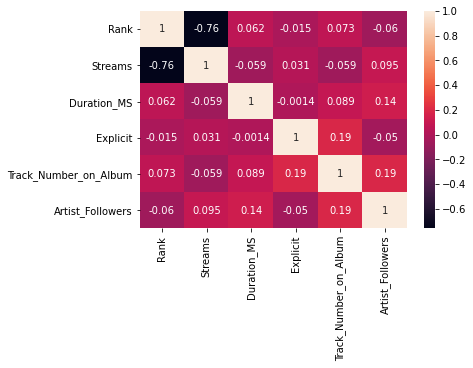

In [43]:
corrMatrix = spotifydf.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [68]:
column = spotifydf["Artist_Followers"]
max_value = column.max()
print(max_value)


78967872


In [250]:
# Seperate the values by years
year2017 = spotifydf[spotifydf['Week'].str.contains("2017")]
year2018 = spotifydf[spotifydf['Week'].str.contains("2018")]
year2019 = spotifydf[spotifydf['Week'].str.contains("2019")]
year2020 = spotifydf[spotifydf['Week'].str.contains("2020")]
year2021 = spotifydf[spotifydf['Week'].str.contains("2021")]

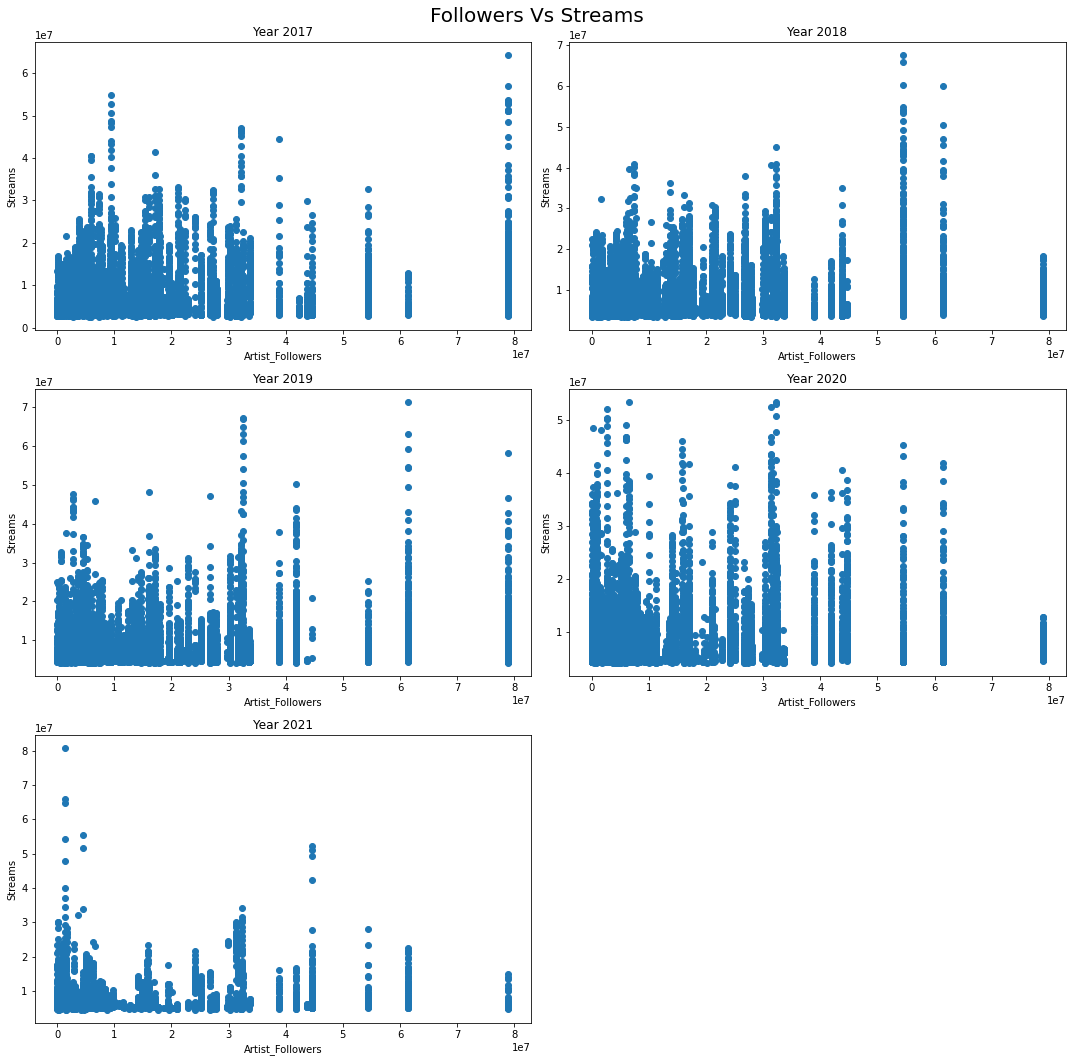

In [249]:
# Not necessary a strong correlation between an Artists Follower count/Streams
fig = plt.figure(figsize=(15,15)) 
fig_dims = (3, 2)
plt.suptitle('Followers Vs Streams', fontsize=20)

ax1 = plt.subplot2grid(fig_dims, (0, 0))

plt.scatter(year2017['Artist_Followers'], year2017['Streams'])
ax1.set_title('Year 2017')
ax1.set_xlabel('Artist_Followers')
ax1.set_ylabel('Streams')

ax2 = plt.subplot2grid(fig_dims, (0,1))

plt.scatter(year2018['Artist_Followers'], year2018['Streams'])
ax2.set_title('Year 2018')
ax2.set_xlabel('Artist_Followers')
ax2.set_ylabel('Streams')


ax3 = plt.subplot2grid(fig_dims, (1, 0))
plt.scatter(year2019['Artist_Followers'], year2019['Streams'])
ax3.set_title('Year 2019')
ax3.set_xlabel('Artist_Followers')
ax3.set_ylabel('Streams')


ax4 = plt.subplot2grid(fig_dims, (1, 1))
plt.scatter(year2020['Artist_Followers'], year2020['Streams'])
ax4.set_title('Year 2020')
ax4.set_xlabel('Artist_Followers')
ax4.set_ylabel('Streams')

ax5 = plt.subplot2grid(fig_dims, (2, 0))
plt.scatter(year2021['Artist_Followers'], year2021['Streams'])
ax5.set_title('Year 2021')
ax5.set_xlabel('Artist_Followers')
ax5.set_ylabel('Streams')
plt.tight_layout()
plt.show()


In [147]:
column_sum = spotifydf['Streams'].sum()
print('Total Streams = ',column_sum)

column_sum = year2017['Streams'].sum()
print('Total Streams of 2017 = ',column_sum)

column_sum = year2018['Streams'].sum()
print('Total Streams of 2018 = ',column_sum)

column_sum = year2019['Streams'].sum()
print('Total Streams of 2019 = ',column_sum)

column_sum = year2020['Streams'].sum()
print('Total Streams of 2020 = ',column_sum)

column_sum = year2021['Streams'].sum()
print('Total Streams of 2021 = ',column_sum)


Total Streams =  369023365986
Total Streams of 2017 =  73442004139
Total Streams of 2018 =  84465788692
Total Streams of 2019 =  89992272913
Total Streams of 2020 =  94796398526
Total Streams of 2021 =  26326901716


In [198]:
#Split Songs by Explicit and none explicit 
(spotifydf['Explicit']).value_counts()

False    27680
True     16515
Name: Explicit, dtype: int64

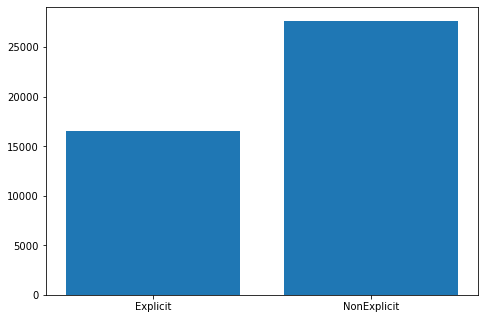

In [231]:
#Non-Explicit songs have a wider audience 
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

Ex = (spotifydf['Explicit']).values.sum() # True
Ey = (~spotifydf['Explicit']).values.sum() # False
CleanvsDirty = ['Explicit', 'NonExplicit']
ratio = [Ex,Ey]
ax.bar(CleanvsDirty,ratio)

plt.show()

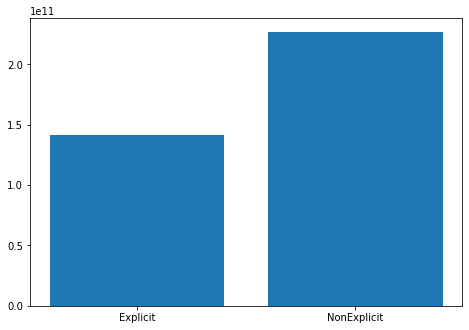

In [248]:
# Non Explicit songs are streamed more than Explicit Songs 
cleanStreams = spotifydf[spotifydf['Explicit'] == False]
dirtyStreams = spotifydf[spotifydf['Explicit'] == True]
SY = (dirtyStreams['Streams'].sum())
SX = (cleanStreams['Streams'].sum())

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

CleanvsDirty = ['Explicit', 'NonExplicit']
ratio = [SY,SX]
ax.bar(CleanvsDirty,ratio)

plt.show()

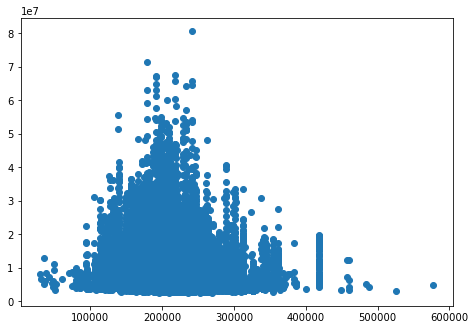

The Mean for Song Duration is 3.4 min
The Meadian for Song Duration is 3.4 min
The Mode for Song Duration is ModeResult(mode=array([211466], dtype=int64), count=array([218]))


In [265]:
#Correlation between duration and streams
fig = plt.figure()
final_Scatter = fig.add_axes([0,0,1,1])

plt.scatter(spotifydf['Duration_MS'],spotifydf['Streams'])
plt.show()

findMean = (np.mean(spotifydf['Duration_MS']))
findMedian = (np.median(spotifydf['Duration_MS']))
findMode = stats.mode(spotifydf['Duration_MS'])

print("The Mean for Song Duration is",round((findMean/1000)/60,1),"min")
print("The Meadian for Song Duration is",round((findMedian/1000)/60,1),"min")
print("The Mode for Song Duration is",findMode)

#Songs between 3Mins24sec And 3Min42sec seem to do the best in terms of stream count.
